<a href="https://colab.research.google.com/github/kvnchandra/ml-assignment-bangkit/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Breast Cancer Diagnostic**


---


*Bangkit Academy 2020 : DPS-1 #05-W05-First Machine Learning Project - MLCC*

Team members :
1.   Kevin Chandra
2.   Oktavia Citra
3.   Gani Nur Fadli

We use data from [kaggle.com ](https://https://www.kaggle.com/) with the title "Breast Cancer Wisconsin (Diagnostic) Data Set". We want to predict whether the cancer is benign or malignant of breast cancer patients. We can build this program because we've learned a lot from [Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course) and [TensorFlow Website](https://www.tensorflow.org/tutorials/)

***Here the step by step and code bellow!***


# **Setup**

identification tensorflow newest version, so there is no error with the caption "tensorflow is already loaded. please restart the runtime to change versions."

In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import all modules and library that you need in the top

In [0]:
# Import relevant modules
from __future__ import absolute_import, division, print_function, unicode_literals
import functools
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.model_selection import train_test_split

# **Initial Data**

If you have data.csv and you want to publish on web, you can use feature Google Spreadsheet. You just need to copy the link that had been generated

In [3]:
# Download data using URL then save as "data.csv"
URL = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQwPxotnLsgXuZt6tIXlAANttT3pxhP4ph0FhSjwvGUXfGKcnFRiqJORQg_9lBC77AH7QaxYypQ24nX/pub?output=csv"
dataset_path = keras.utils.get_file("data.csv", URL)
dataset_path

   8192/Unknown - 0s 0us/step

'/root/.keras/datasets/data.csv'

This is using funcation read data csv from pandas. It's so simple

In [4]:
# Read data that had been dowloaded
dataframe = pd.read_csv(dataset_path)
dataframe.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,1.184,2.776,3.001,1.471,2.419,7.871,1.095,9.053,8.589,153.40,6.399,4.904,5.373,1.587,3.003,6.193,25.38,17.33,184.60,2019.0,1.622,6.656,7.119,2.654,4.601,1.189
1,842517,M,20.57,17.77,132.90,1326.0,8.474,7.864,869.000,7.017,1.812,5.667,5.435,7.339,3.398,74.08,5.225,1.308,186.000,134.000,1.389,3.532,24.99,23.41,158.80,1956.0,1.238,1.866,2.416,186.000,275.000,8.902
2,84300903,M,19.69,21.25,130.00,1203.0,1.096,1.599,1.974,1.279,2.069,5.999,7.456,7.869,4.585,94.03,615.000,4.006,3.832,2.058,225.000,4.571,23.57,25.53,152.50,1709.0,1.444,4.245,4.504,243.000,3.613,8.758
3,84348301,M,11.42,20.38,77.58,386.1,1.425,2.839,2.414,1.052,2.597,9.744,4.956,1.156,3.445,27.23,911.000,7.458,5.661,1.867,5.963,9.208,14.91,26.50,98.87,567.7,2.098,8.663,6.869,2.575,6.638,173.000
4,84358402,M,20.29,14.34,135.10,1297.0,1.003,1.328,198.000,1.043,1.809,5.883,7.572,7.813,5.438,94.44,1.149,2.461,5.688,1.885,1.756,5.115,22.54,16.67,152.20,1575.0,1.374,205.000,0.400,1.625,2.364,7.678


Based on the table above, **id** won't be used as feature for classification problem. So we remove the **id**

In [5]:
dataframe.drop('id', axis=1, inplace=True)  # dropping the 'id' column

print("Row, Col", dataframe.shape)          # (row,col)

Row, Col (569, 31)


For diagnosis, we change the label as 1 and 0 :
- Benign : 0
- Malignant : 1

In [6]:
dataframe['diagnosis'] = dataframe['diagnosis'].map({'M':1, 'B':0})

dataframe.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,1.184,2.776,3.001,1.471,2.419,7.871,1.095,9.053,8.589,153.40,6.399,4.904,5.373,1.587,3.003,6.193,25.38,17.33,184.60,2019.0,1.622,6.656,7.119,2.654,4.601,1.189
1,1,20.57,17.77,132.90,1326.0,8.474,7.864,869.000,7.017,1.812,5.667,5.435,7.339,3.398,74.08,5.225,1.308,186.000,134.000,1.389,3.532,24.99,23.41,158.80,1956.0,1.238,1.866,2.416,186.000,275.000,8.902
2,1,19.69,21.25,130.00,1203.0,1.096,1.599,1.974,1.279,2.069,5.999,7.456,7.869,4.585,94.03,615.000,4.006,3.832,2.058,225.000,4.571,23.57,25.53,152.50,1709.0,1.444,4.245,4.504,243.000,3.613,8.758
3,1,11.42,20.38,77.58,386.1,1.425,2.839,2.414,1.052,2.597,9.744,4.956,1.156,3.445,27.23,911.000,7.458,5.661,1.867,5.963,9.208,14.91,26.50,98.87,567.7,2.098,8.663,6.869,2.575,6.638,173.000
4,1,20.29,14.34,135.10,1297.0,1.003,1.328,198.000,1.043,1.809,5.883,7.572,7.813,5.438,94.44,1.149,2.461,5.688,1.885,1.756,5.115,22.54,16.67,152.20,1575.0,1.374,205.000,0.400,1.625,2.364,7.678


In classification, you must have 3 types of data. Those are train data, validation data, and test data.

In [7]:
# Separate data into 3 types
train, test = train_test_split(dataframe, 
                               test_size=0.2,
                               stratify=dataframe['diagnosis'])     # split data into same ratio based on diagnosis

print('Length of\n\tTrain Data\t: ', len(train),
      '\n\tTest Data\t: ', len(test))

Length of
	Train Data	:  455 
	Test Data	:  114


# **Inspect Data**

Choose one criteria column from the data

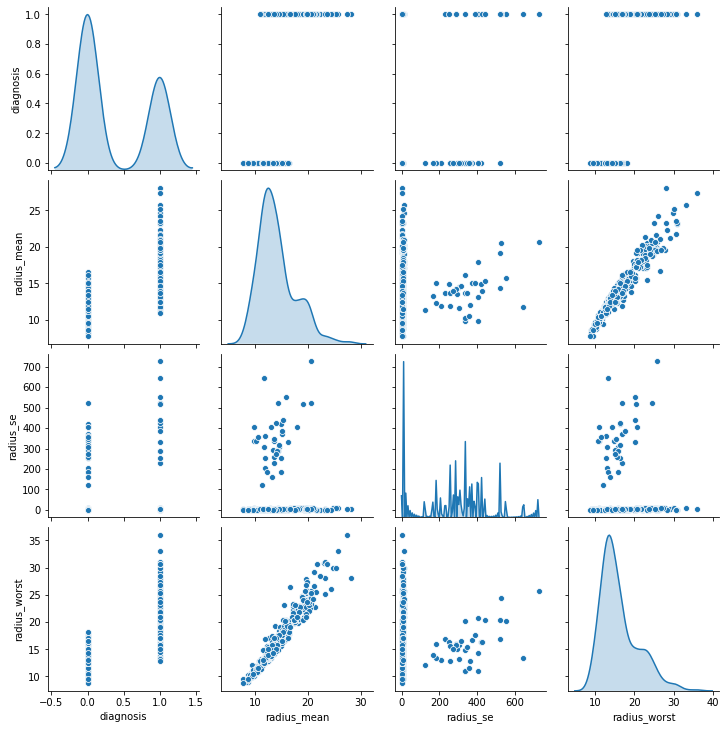

In [8]:
# Create plot to display data
sns.pairplot(train[["diagnosis", "radius_mean",	"radius_se", "radius_worst"]], 
             diag_kind="kde")